# Imports

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import warnings

 Loading Data

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


ML Imports

In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, GammaRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Linear Regression on LotArea

In [5]:
df_area = df[['LotArea', 'SalePrice']]

In [6]:
df_features = df_area[['LotArea']]
df_target = df_area[['SalePrice']]

In [7]:
X = df_features.LotArea.values
y = df_target.SalePrice.values

X = X.reshape(X.size, 1)
y = y.reshape(y.size, 1)

In [8]:
reg = LinearRegression().fit(X, y)

Scoring the 1 dimentional linear regression

In [9]:
reg.score(X, y)

0.0696133153821119

Plotting the Predictions with the actual data

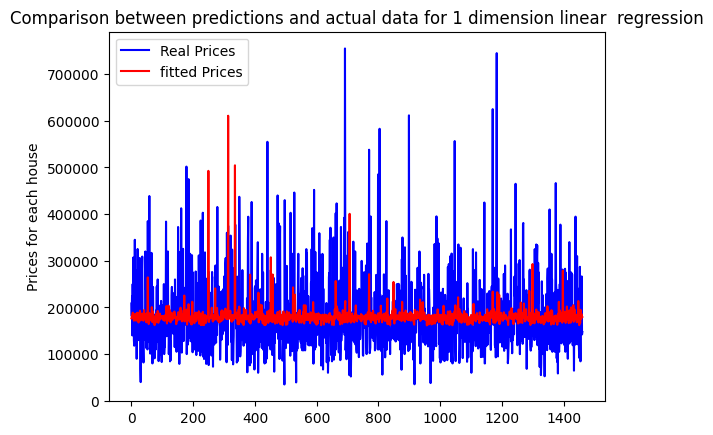

In [10]:
y_pred = reg.predict(X)
x = np.linspace(start=0, stop=X.size, num=X.size)
plt.plot(x, y, color='b', label="Real Prices")
plt.plot(x, y_pred, color='r' , label="fitted Prices")
plt.legend()
plt.ylabel("Prices for each house")
plt.title("Comparison between predictions and actual data for 1 dimension linear  regression")
plt.show()


Testing the model

In [11]:
df_test = pd.read_csv("./test.csv")

In [12]:
display(df_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [13]:
X_test = df_test.LotArea.values
X_test = X_test.reshape(X_test.size, 1)

In [14]:
y_test = reg.predict(X_test)
z = np.column_stack((range(1461, 1461 + y_test.size), y_test))
display(z)

array([[  1461.        , 183242.02591962],
       [  1462.        , 188796.45173189],
       [  1463.        , 187878.76398899],
       ...,
       [  2917.        , 200835.59093103],
       [  2918.        , 180761.95904466],
       [  2919.        , 179052.58187597]])

multi variable linear regression

In [15]:
df_mv = df[['YrSold', 'MoSold', 'LotArea', 'BedroomAbvGr']]
df_target_mv = df[['SalePrice']]

In [16]:
X_mv = df_mv.values
y_mv = df_target_mv.values
y_mv = y_mv.reshape(y_mv.size, 1)

In [17]:
reg_mv = LinearRegression().fit(X_mv, y_mv)

In [18]:
reg_mv.score(X_mv, y_mv)

0.090351787238105

Plotting predictions for the training data

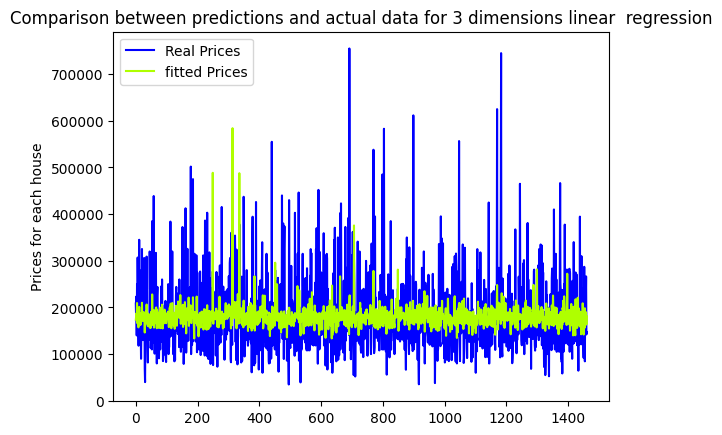

In [19]:
y_pred_mv = reg_mv.predict(X_mv)
x_mv = np.linspace(0, y_mv.size, y_mv.size)
plt.plot(x_mv, y_mv, color='b', label="Real Prices")
plt.plot(x_mv, y_pred_mv, color='#AFFF00' , label="fitted Prices")
plt.legend()
plt.ylabel("Prices for each house")
plt.title("Comparison between predictions and actual data for 3 dimensions linear  regression")
plt.show()

In [20]:
X_test_mv = df_test[['YrSold', 'MoSold', 'LotArea', 'BedroomAbvGr']].values
y_test_mv = reg_mv.predict(X_test_mv)
z_mv = np.column_stack((range(1461, 1461 + y_test_mv.size), y_test_mv))
z_mv[:20]

array([[  1461.        , 169277.0524984 ],
       [  1462.        , 187758.39398877],
       [  1463.        , 183583.68356955],
       [  1464.        , 179317.47751083],
       [  1465.        , 150730.0799765 ],
       [  1466.        , 177150.98924731],
       [  1467.        , 172070.65922916],
       [  1468.        , 175110.95651955],
       [  1469.        , 162011.69883166],
       [  1470.        , 160726.24783142],
       [  1471.        , 157933.279456  ],
       [  1472.        , 145291.24502039],
       [  1473.        , 159672.01763182],
       [  1474.        , 164167.51830189],
       [  1475.        , 150891.63824405],
       [  1476.        , 179460.96518734],
       [  1477.        , 185034.62891405],
       [  1478.        , 182352.19264466],
       [  1479.        , 183053.4582138 ],
       [  1480.        , 187823.33925428]])

# Lasso/Ridge Regression

In [21]:
reg_ridge = Ridge(alpha=1).fit(X=X_mv, y=y_mv)
print(reg_ridge.score(X_mv, y_mv))
reg_lasso = Lasso(alpha=1.5).fit(X=X_mv, y=y_mv)
print(reg_lasso.score(X_mv, y_mv))
#No noticeable difference to account for

0.09035176726826866
0.09035178649744047


In [102]:
# Utility function for saving model trainingscore for different penalty coefficients
def result_variation_model(X, y, M, alpha_min, alpha_max, stride, **model_args):
    """
    Computes model fitting scores using a range of penalty coefficients
    """
    output = []
    alpha_list = []
    alpha = alpha_min
    while alpha <= alpha_max:
        reg = M(alpha = alpha, **model_args).fit(X=X, y=y)
        score = reg.score(X, y)
        output.append(score)
        alpha_list.append(alpha)
        alpha+=stride
    return alpha_list, output

# Utility function for saving model test score for different penalty coefficients
def result_variation_model_test(X_train, y_train, X_test, y_test, M, alpha_min, alpha_max, stride, **model_args):
    """
    Computes model fitting scores using a range of penalty coefficients
    """
    output = []
    alpha_list = [alpha_min + i*stride for i in range(int((alpha_max - alpha_min)//stride) + 1)]
    alpha = alpha_min
    for alpha in tqdm(alpha_list, desc= f"{M.__name__} progress"):
        reg = M(alpha = alpha, **model_args).fit(X=X_train, y=y_train)
        score = reg.score(X_test, y_test)
        output.append(score)
    return alpha_list, output



In [44]:
alpha_min = 0
alpha_max = 5
stride = 0.005
_, ridge_output = result_variation_model(X=X_mv, y=y_mv, M=Ridge, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)
_, lasso_output = result_variation_model(X=X_mv, y=y_mv, M=Lasso, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)

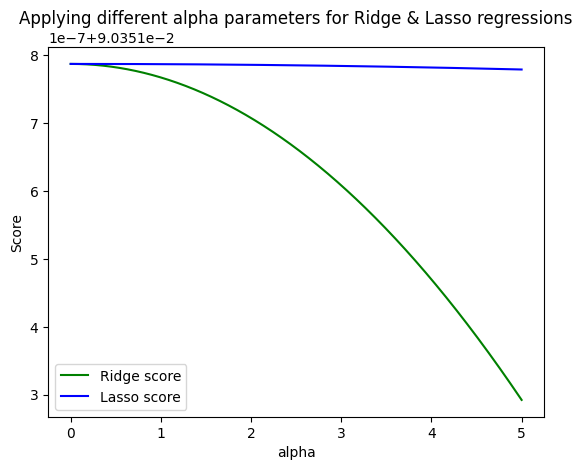

In [24]:
alpha = np.linspace(alpha_min, alpha_max, len(ridge_output))
plt.plot(alpha, ridge_output, color='g', label="Ridge score")
plt.plot(alpha, lasso_output, color='b', label="Lasso score")
plt.legend()
plt.ylabel("Score")
plt.xlabel("alpha")
plt.title("Applying different alpha parameters for Ridge & Lasso regressions")
plt.show()

# Considering Different features for linear Regressions based on correlations with SalePrice

In [25]:
feature_list = ['YearRemodAdd',
                      'YearBuilt',
                      'TotRmsAbvGrd',
                      'FullBath',
                      '1stFlrSF',
                      'TotalBsmtSF',
                      'GarageArea',
                      'GarageCars',
                      'GrLivArea',
                      'OverallQual']
df_mv_high_corr = df[feature_list]
df_target_mv_high_corr = df[['SalePrice']]

In [26]:
X_high_corr = df_mv_high_corr.values
y_high_corr = df_target_mv_high_corr.values
y_high_corr = y_high_corr.reshape(y_high_corr.size, 1)

In [27]:
reg_high_corr = LinearRegression().fit(X=X_high_corr, y=y_high_corr)
reg_high_corr.score(X_high_corr, y_high_corr)

0.7736928402773304

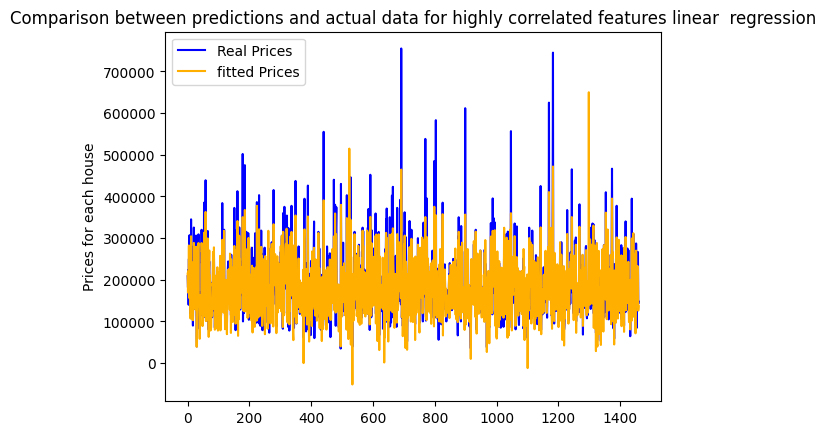

In [28]:
y_pred_high_corr = reg_high_corr.predict(X_high_corr)
x_high_corr = np.linspace(0, y_high_corr.size, y_high_corr.size)
plt.plot(x_high_corr, y_high_corr, color='b', label="Real Prices")
plt.plot(x_high_corr, y_pred_high_corr, color='#FFAF00' , label="fitted Prices")
plt.legend()
plt.ylabel("Prices for each house")
plt.title("Comparison between predictions and actual data for highly correlated features linear  regression")
plt.show()

In [29]:
X_test_high_corr = df_test[feature_list].values
X_test_high_corr = np.where(np.isfinite(X_test_high_corr), X_test_high_corr, 0)
y_test_high_corr = reg_high_corr.predict(X_test_high_corr)
z_high_corr = np.column_stack((range(1461, 1461 + y_test_high_corr.size), y_test_high_corr))
z_high_corr[:20]

array([[  1461.        , 110135.92110887],
       [  1462.        , 159059.96019541],
       [  1463.        , 169683.67729304],
       [  1464.        , 188059.73683512],
       [  1465.        , 219781.96751947],
       [  1466.        , 182152.00561817],
       [  1467.        , 175453.94214061],
       [  1468.        , 175115.15705028],
       [  1469.        , 210229.82950256],
       [  1470.        , 102017.78779349],
       [  1471.        , 210420.14451696],
       [  1472.        , 119310.28941645],
       [  1473.        , 107391.69501082],
       [  1474.        , 164580.87210858],
       [  1475.        , 146068.19689132],
       [  1476.        , 328672.51136165],
       [  1477.        , 268102.53010742],
       [  1478.        , 296230.72831636],
       [  1479.        , 286760.11114706],
       [  1480.        , 387050.16395865]])

Ridge & Lasso Regressions

In [30]:
alpha_min = 0
alpha_max = 5
stride = 0.005
warnings.catch_warnings()
warnings.filterwarnings(action='ignore')
_, ridge_output = result_variation_model(X=X_high_corr, y=y_high_corr, M=Ridge, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)
_, lasso_output = result_variation_model(X=X_high_corr, y=y_high_corr, M=Lasso, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)

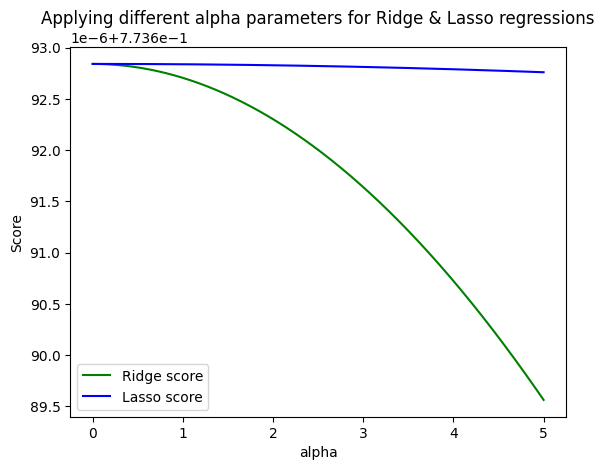

In [31]:
alpha = np.linspace(alpha_min, alpha_max, len(ridge_output))
plt.plot(alpha, ridge_output, color='g', label="Ridge score")
plt.plot(alpha, lasso_output, color='b', label="Lasso score")
plt.legend()
plt.ylabel("Score")
plt.xlabel("alpha")
plt.title("Applying different alpha parameters for Ridge & Lasso regressions")
plt.show()

In [32]:
from sklearn.exceptions import ConvergenceWarning

alpha_min = 0
alpha_max = 5
stride = 0.1

gamma_args = {'verbose': False, 'max_iter': 15000}
with warnings.catch_warnings():
 warnings.filterwarnings("ignore", category=ConvergenceWarning)

# GammaRegressor expects 1D Arrays (N, )
 alpha_gamma, gamma_outputs = result_variation_model(X_high_corr, y_high_corr.ravel(), GammaRegressor, alpha_min=alpha_min
                                                     , alpha_max=alpha_max, stride=stride, **gamma_args)

Plotting Gamma Regression training scores for multiple L2 penalization coefficients

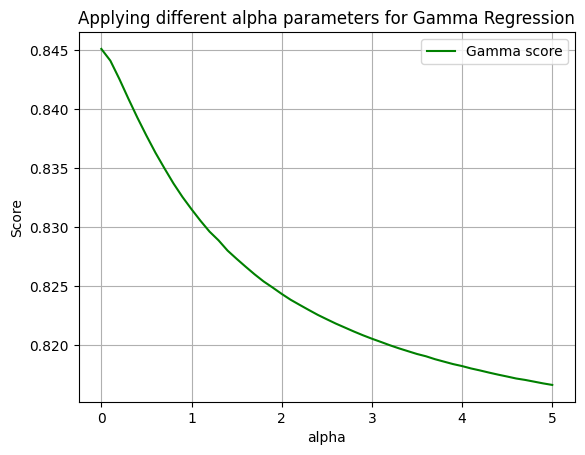

In [33]:
alpha = np.linspace(alpha_min, alpha_max, len(gamma_outputs))
plt.plot(alpha, gamma_outputs, color='g', label="Gamma score")
plt.legend()
plt.grid()
plt.ylabel("Score")
plt.xlabel("alpha")
plt.title("Applying different alpha parameters for Gamma Regression")
plt.show()

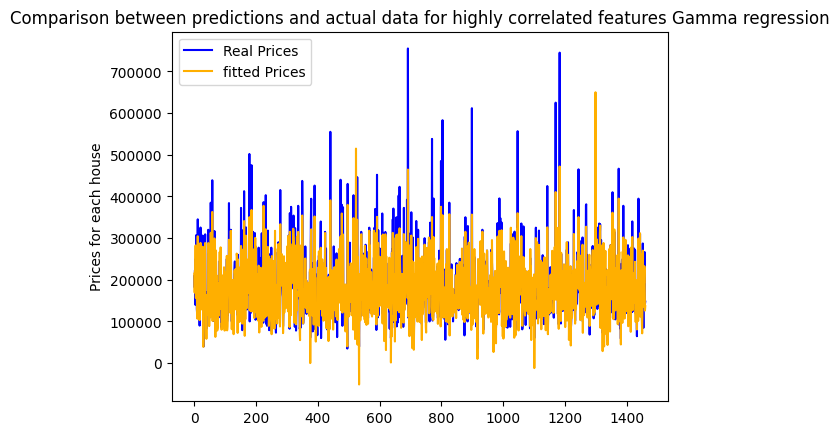

In [34]:
#Fitting with optimal L2 penalty
alpha_opti = alpha_gamma[gamma_outputs.index(max(gamma_outputs))]
reg_gamma_opti = GammaRegressor(alpha = alpha_opti, max_iter=2700).fit(X_high_corr, y_high_corr.ravel())

y_pred_gamma_high_corr = reg_high_corr.predict(X_high_corr)
x_gamma_high_corr = np.linspace(0, y_pred_gamma_high_corr.size, y_pred_gamma_high_corr.size)

plt.plot(x_gamma_high_corr, y_high_corr, color='b', label="Real Prices")
plt.plot(x_gamma_high_corr, y_pred_high_corr, color='#FFAF00' , label="fitted Prices")
plt.legend()
plt.ylabel("Prices for each house")
plt.title("Comparison between predictions and actual data for highly correlated features Gamma regression")
plt.show()

# Splitting the data and running cross validation

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_high_corr, y_high_corr, test_size=0.4, random_state=42)
reg_linear = LinearRegression().fit(X_train, y_train)
y_test_pred = reg_linear.predict(X_test)
linear_test_score = reg_linear.score(X=X_test, y=y_test)
linear_test_score

0.7908320198833418

Regression Decision Trees

In [109]:
reg_decision_tree = DecisionTreeRegressor().fit(X=X_train, y=y_train)
decision_tree_test_score = reg_decision_tree.score(X=X_test, y=y_test)
display(decision_tree_test_score)

reg_random_forest = RandomForestRegressor().fit(X=X_train, y=y_train)
random_forest_score = reg_random_forest.score(X=X_test, y=y_test)
display(random_forest_score)

0.763174260851777

0.8773852892554739

In [111]:
alpha_min = 0
alpha_max = 1000
stride = 0.5
#gamma_args = {'max_iter': 15000, 'verbose': False}
warnings.catch_warnings()
warnings.filterwarnings(action='ignore')

alpha_ridge, ridge_outputs = result_variation_model_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, M=Ridge, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)
alpha_lasso, lasso_outputs = result_variation_model_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, M=Lasso, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)
#alpha_random_forest, random_forest_outputs = result_variation_model_test(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, M=RandomForestRegressor, alpha_min=alpha_min, alpha_max=alpha_max, stride=stride, max_iter=15000)

#alpha_gamma, gamma_outputs = result_variation_model_test(X_train=X_train, y_train=y_train.values.ravel(), X_test=X_test, y_test=y_test.values.ravel(), M=GammaRegressor, alpha_min=alpha_min
#                                                  , alpha_max=alpha_max, stride=stride, **gamma_args) 

#Optimal alpha penalties
alpha_ridge_opti = alpha_ridge[ridge_outputs.index(max(ridge_outputs))]
alpha_lasso_opti = alpha_lasso[lasso_outputs.index(max(lasso_outputs))]
#alpha_random_forest_opti = alpha_random_forest[random_forest_outputs.index(max(random_forest_outputs))]
#alpha_gamma_opti = alpha_gamma[gamma_outputs.index(max(gamma_outputs))]

print("Ridge score : ", max(ridge_outputs))
print("Lasso score : ", max(lasso_outputs))
#print("Random forest score : ", max(random_forest_outputs))
#print("Gamma score : ", max(gamma_outputs))

print("alpha lasso opti : ", alpha_lasso_opti)
print("alpha ridge opti : ", alpha_ridge_opti)
#print("alpha random forest opti : ", alpha_random_forest_opti)
#print("alpha gamma opti : ", alpha_gamma_opti)

Lasso progress: 100%|██████████| 2001/2001 [00:06<00:00, 304.31it/s]

Ridge score :  0.8219497093550491
Lasso score :  0.8212192557561406
alpha lasso opti :  355.5
alpha ridge opti :  134.5


Plotting Ridge & Lasso Regression test scores for multiple L2 penalization coefficients

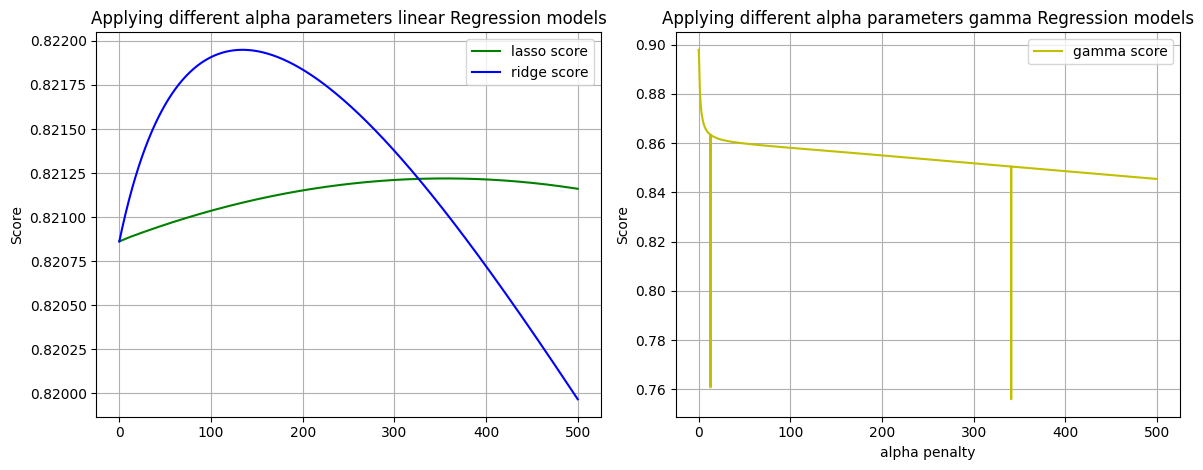

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2)
alpha = np.linspace(alpha_min, alpha_max, len(alpha_ridge))
ax[0].plot(alpha, lasso_outputs, color='g', label="lasso score")
ax[0].plot(alpha, ridge_outputs, color='b', label="ridge score")
ax[1].plot(alpha, gamma_outputs, color='#C1C000', label="gamma score")
ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel("Score")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("alpha penalty")
ax[1].set_xlabel("alpha penalty")
ax[0].set_title("Applying different alpha parameters linear Regression models")
ax[1].set_title("Applying different alpha parameters gamma Regression models")

fig.set_figwidth(val=12)
fig.tight_layout()

# Cross Validation

In [36]:
from sklearn.model_selection import KFold

K Fold Cross Validation

In [37]:
gamma_scores = []
model = GammaRegressor(alpha=0,  max_iter=10000)
cv = KFold(n_splits=15, random_state=42, shuffle=True)
for train_index, test_index in cv.split(df_mv_high_corr):
    #print("Index of training : ", train_index, end="\n")
    #print("Index of testing : ", test_index, end="\n")
    #display(df_target_mv_high_corr.iloc[train_index])
    #display(df_target_mv_high_corr.iloc[test_index])

    X_train, X_test, y_train, y_test = df_mv_high_corr.iloc[train_index], df_mv_high_corr.iloc[test_index], df_target_mv_high_corr.iloc[train_index], df_target_mv_high_corr.iloc[test_index]
    model.fit(X_train.values, y_train.values.ravel())
    #display(y_test.values.ravel().shape)
    gamma_scores.append(model.score(X_test.values, y_test.values.ravel()))

In [ ]:
display(gamma_scores)